In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/abc/sales_data.csv');
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [ ]:
print(data.describe())

In [ ]:
print(data.isnull().sum())


In [ ]:
for col in data.columns:
    if data[col].dtype == 'object' or pd.api.types.is_categorical_dtype(data[col]):
        print(f"\nCategorical Feature: {col}")
        print(f"Number of Unique Values: {data[col].nunique()}")
        print(data[col].value_counts())


Categorical Feature: Date
Number of Unique Values: 760
Date
2024-01-30    100
2022-01-01    100
2022-01-02    100
2022-01-03    100
2022-01-04    100
             ... 
2022-01-13    100
2022-01-12    100
2022-01-11    100
2022-01-10    100
2022-01-09    100
Name: count, Length: 760, dtype: int64

Categorical Feature: Store ID
Number of Unique Values: 5
Store ID
S001    15200
S002    15200
S003    15200
S004    15200
S005    15200
Name: count, dtype: int64

Categorical Feature: Product ID
Number of Unique Values: 20
Product ID
P0001    3800
P0002    3800
P0003    3800
P0004    3800
P0005    3800
P0006    3800
P0007    3800
P0008    3800
P0009    3800
P0010    3800
P0011    3800
P0012    3800
P0013    3800
P0014    3800
P0015    3800
P0016    3800
P0017    3800
P0018    3800
P0019    3800
P0020    3800
Name: count, dtype: int64

Categorical Feature: Category
Number of Unique Values: 5
Category
Groceries      30400
Furniture      13680
Clothing       12160
Toys           10640
Electronic

/tmp/ipython-input-1805135093.py:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if data[col].dtype == 'object' or pd.api.types.is_categorical_dtype(data[col]):
/tmp/ipython-input-1805135093.py:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if data[col].dtype == 'object' or pd.api.types.is_categorical_dtype(data[col]):
/tmp/ipython-input-1805135093.py:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if data[col].dtype == 'object' or pd.api.types.is_categorical_dtype(data[col]):


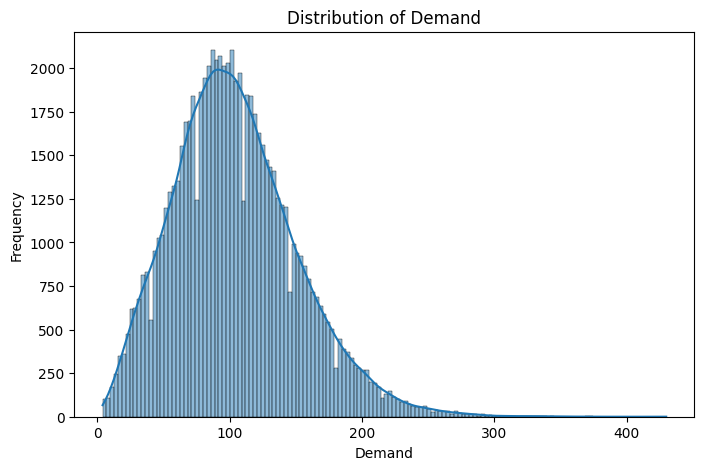

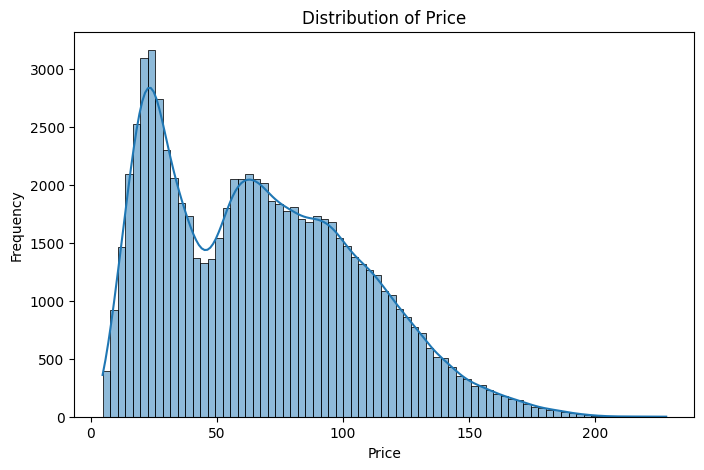

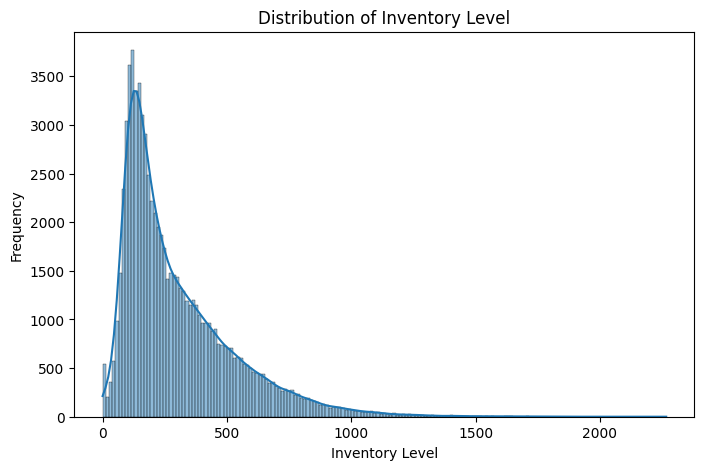

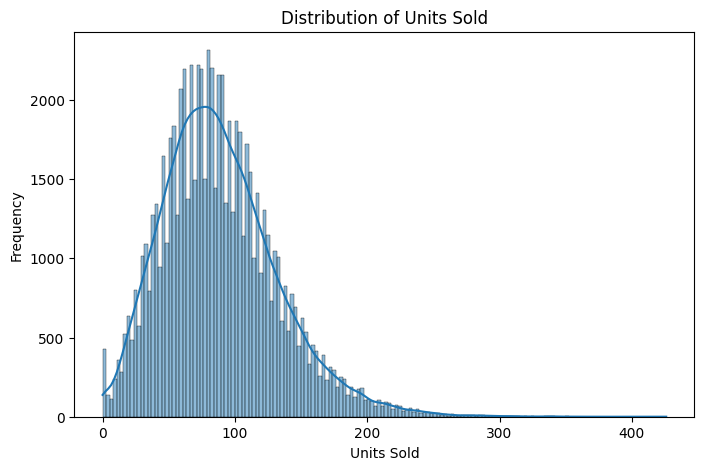

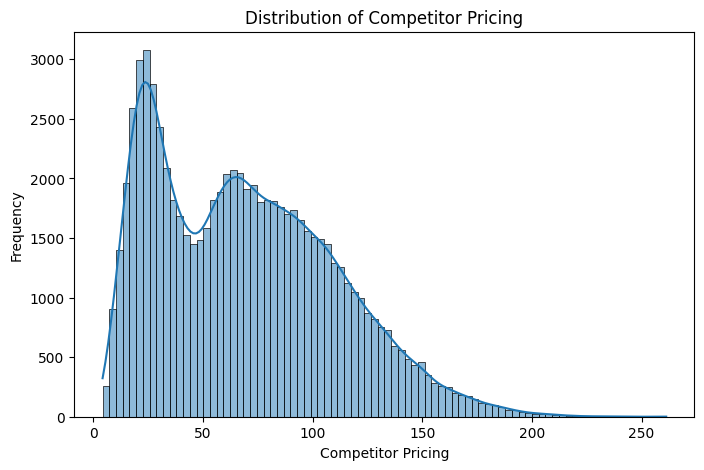

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify five key numerical features
key_numerical_features = ['Demand', 'Price', 'Inventory Level', 'Units Sold', 'Competitor Pricing']

# Create histograms for each feature
for feature in key_numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

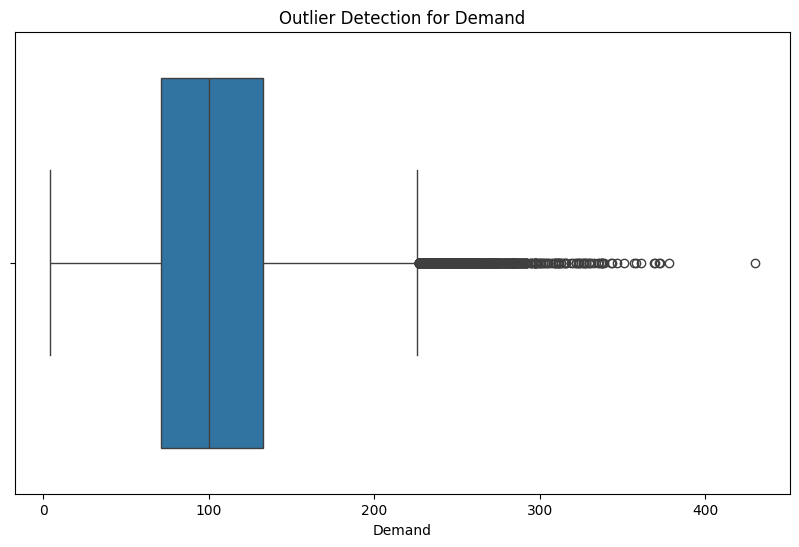

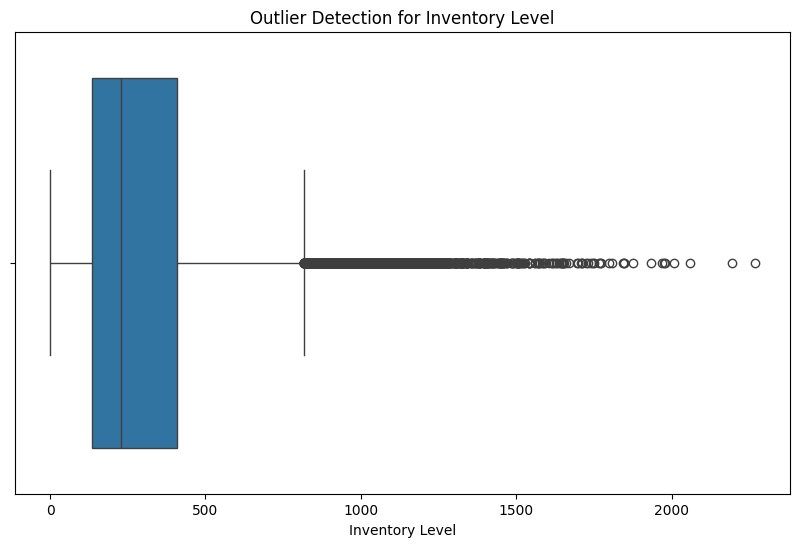

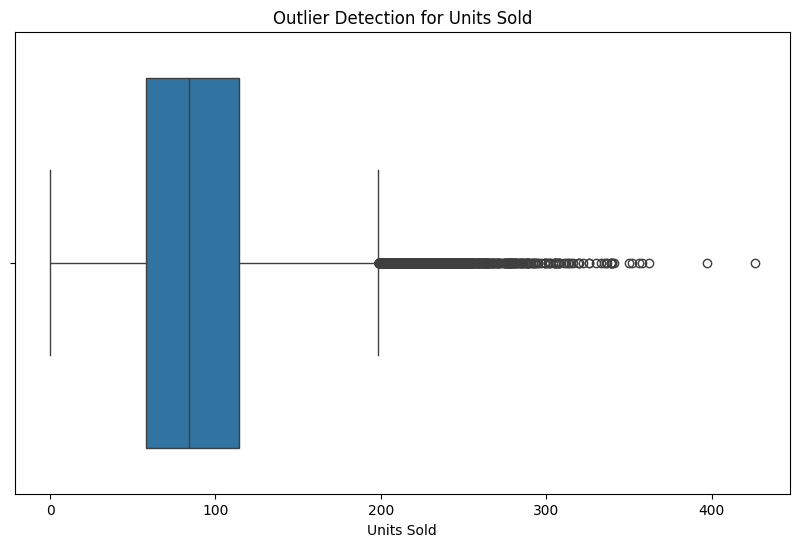

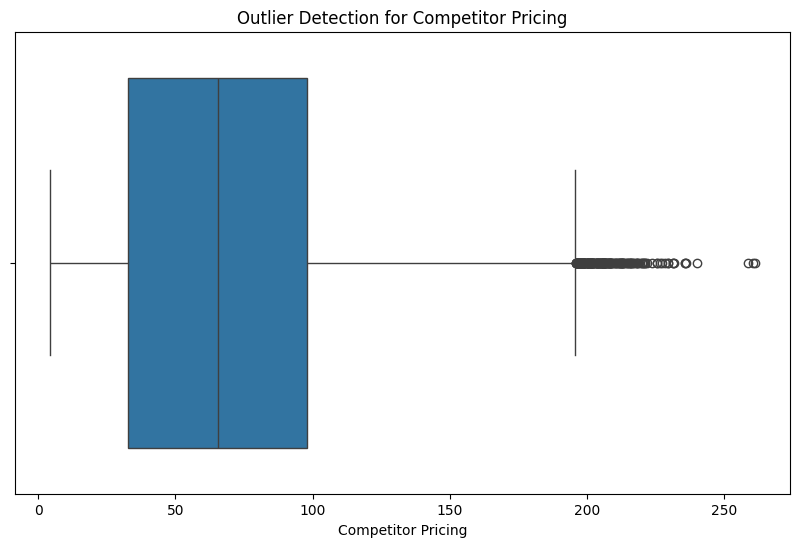

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the key numerical features for outlier detection
key_numerical_features_for_outliers = ['Demand', 'Inventory Level', 'Units Sold', 'Competitor Pricing']

# Generate individual box plots for each feature using the original 'data' DataFrame
for feature in key_numerical_features_for_outliers:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Outlier Detection for {feature}')
    plt.xlabel(feature)
    plt.show()

In [ ]:
df=data.drop(['Product ID','Store ID'],axis=1).copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Category            76000 non-null  object 
 2   Region              76000 non-null  object 
 3   Inventory Level     76000 non-null  int64  
 4   Units Sold          76000 non-null  int64  
 5   Units Ordered       76000 non-null  int64  
 6   Price               76000 non-null  float64
 7   Discount            76000 non-null  int64  
 8   Weather Condition   76000 non-null  object 
 9   Promotion           76000 non-null  int64  
 10  Competitor Pricing  76000 non-null  float64
 11  Seasonality         76000 non-null  object 
 12  Epidemic            76000 non-null  int64  
 13  Demand              76000 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 8.1+ MB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'])

0       2022-01-01
1       2022-01-01
2       2022-01-01
3       2022-01-01
4       2022-01-01
           ...    
75995   2024-01-30
75996   2024-01-30
75997   2024-01-30
75998   2024-01-30
75999   2024-01-30
Name: Date, Length: 76000, dtype: datetime64[ns]


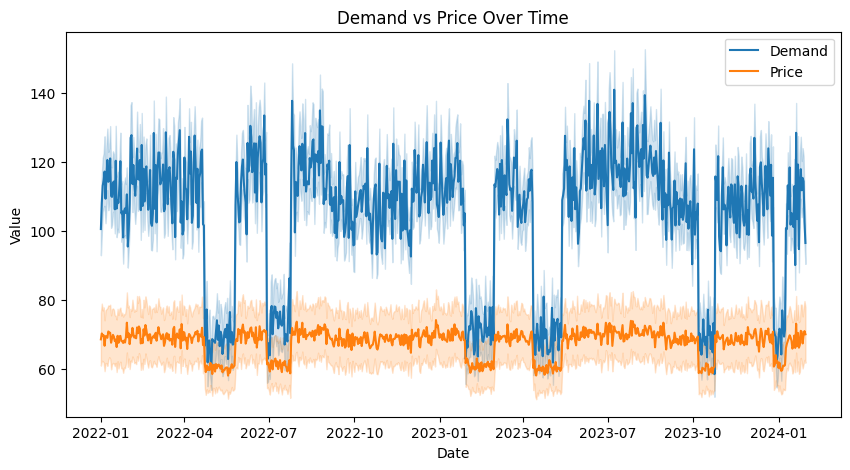

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Demand', data=df, label='Demand')
sns.lineplot(x='Date', y='Price', data=df, label='Price')
plt.title("Demand vs Price Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

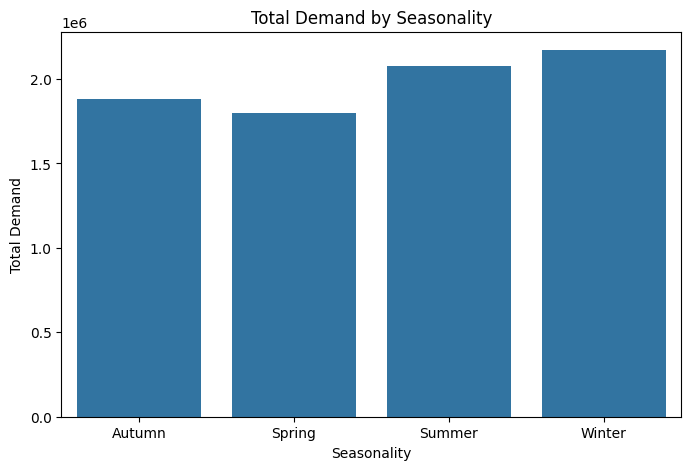

In [ ]:
seasonal_demand = df.groupby('Seasonality')['Demand'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Seasonality', y='Demand', data=seasonal_demand)
plt.title('Total Demand by Seasonality')
plt.xlabel('Seasonality')
plt.ylabel('Total Demand')
plt.show()

In [ ]:
seasonal_category_demand = df.groupby(['Seasonality', 'Category'])['Demand'].sum().reset_index()

max_demand_per_season = seasonal_category_demand.loc[seasonal_category_demand.groupby('Seasonality')['Demand'].idxmax()]

print("Category with highest demand in each season:")
display(max_demand_per_season)

Category with highest demand in each season:


,Seasonality,Category,Demand
3,Autumn,Groceries,858683
8,Spring,Groceries,810762
13,Summer,Groceries,1045631
18,Winter,Groceries,962608


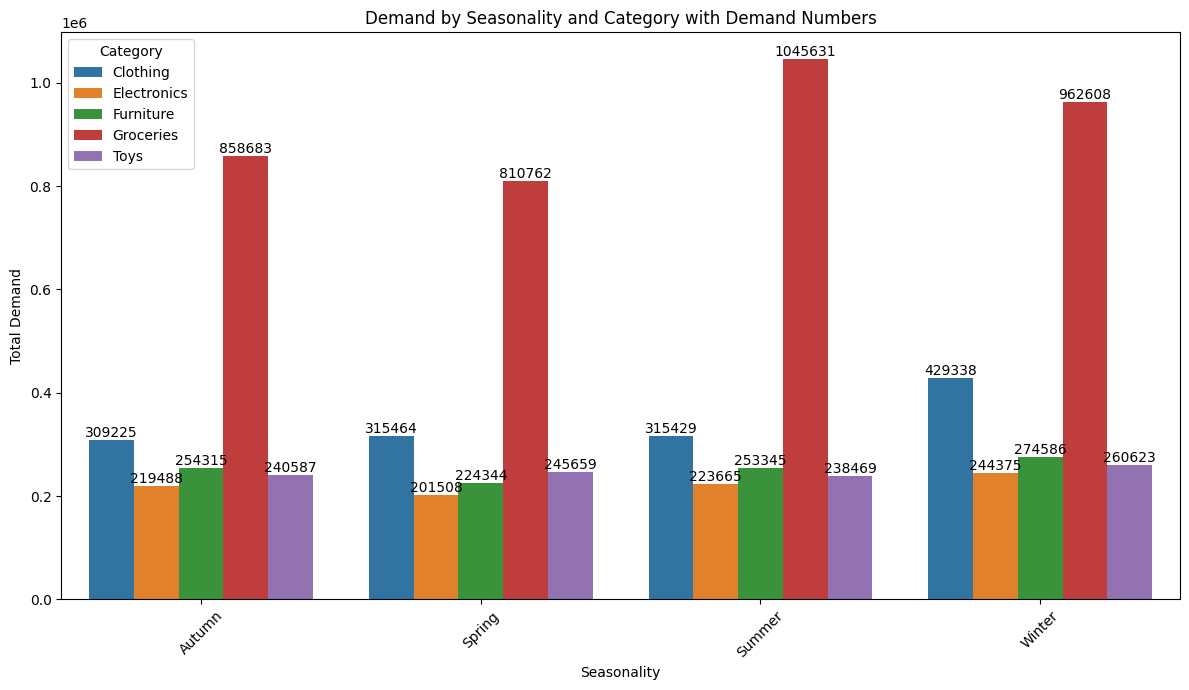

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Seasonality', y='Demand', hue='Category', data=seasonal_category_demand)
plt.title('Demand by Seasonality and Category with Demand Numbers')
plt.xlabel('Seasonality')
plt.ylabel('Total Demand')
plt.legend(title='Category')
plt.xticks(rotation=45)

# Add demand numbers to the bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

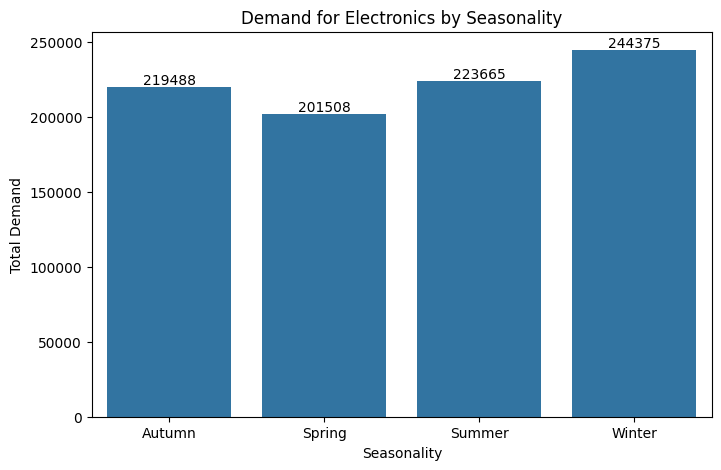

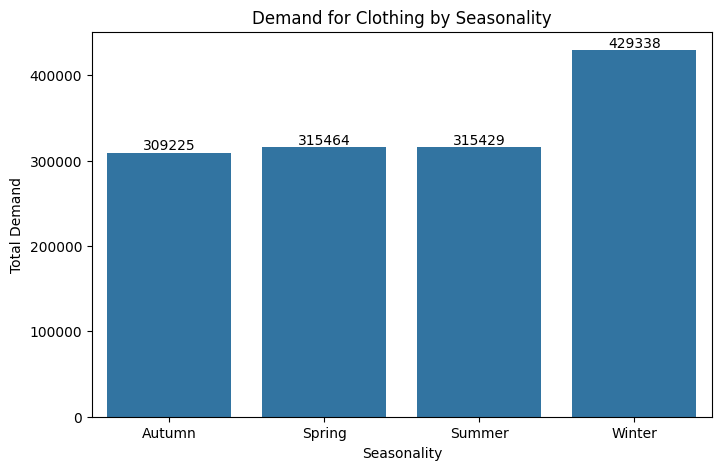

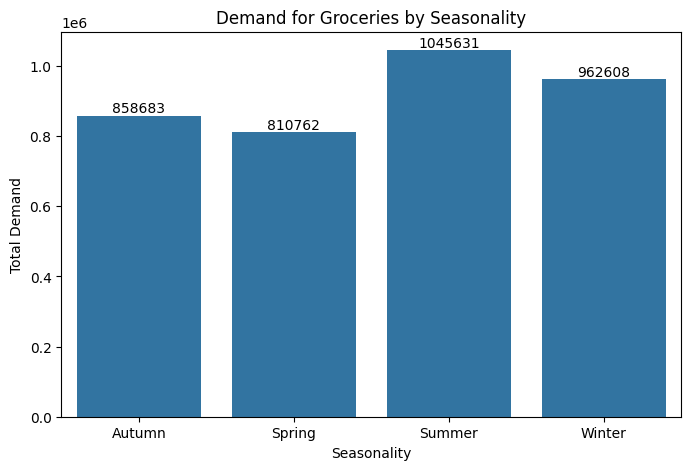

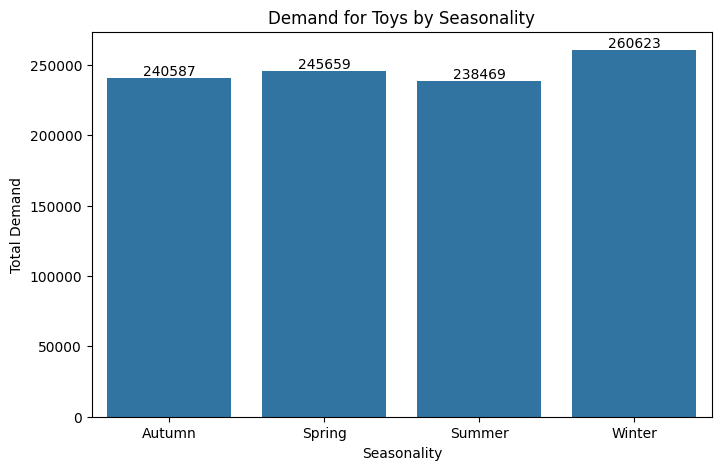

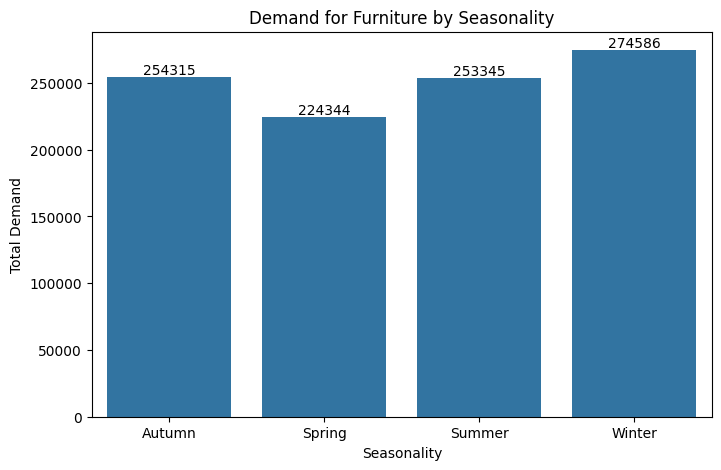

In [ ]:
categories = df['Category'].unique()

for category in categories:
    category_data = df[df['Category'] == category]
    seasonal_demand_category = category_data.groupby('Seasonality')['Demand'].sum().reset_index()

    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x='Seasonality', y='Demand', data=seasonal_demand_category)
    plt.title(f'Demand for {category} by Seasonality')
    plt.xlabel('Seasonality')
    plt.ylabel('Total Demand')

    # Add demand numbers to the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge')

    plt.show()

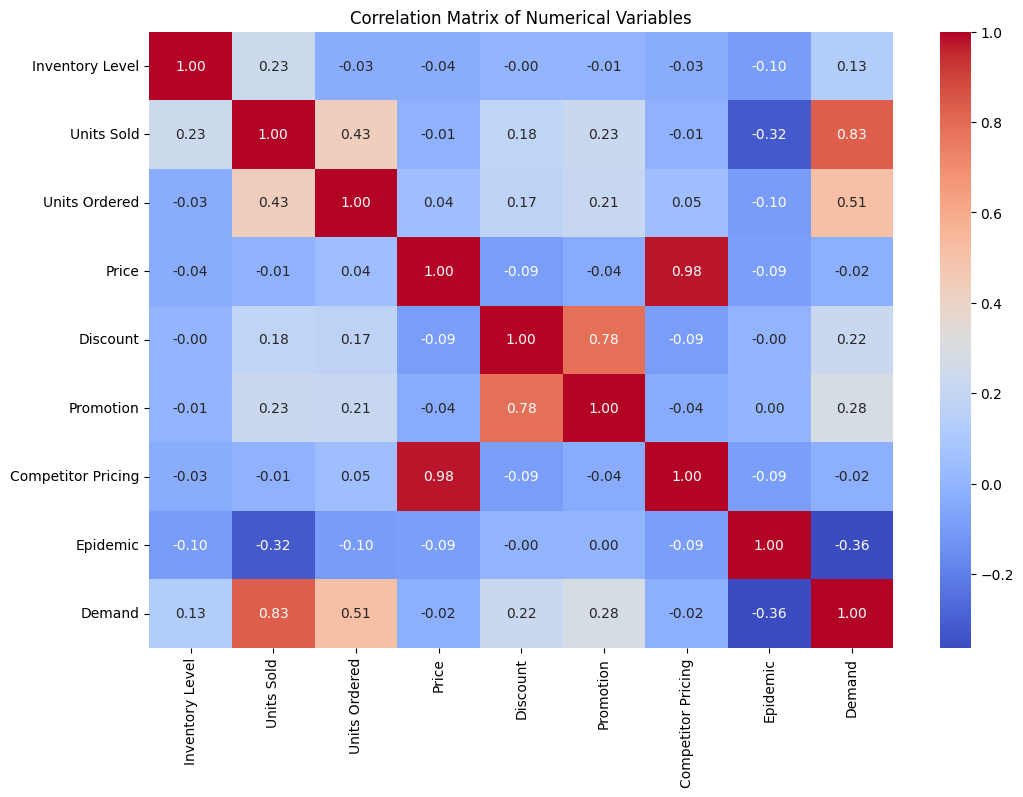

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

/tmp/ipython-input-2441941406.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_price_demand = df.groupby('Demand_Bins')['Price'].mean().reset_index()


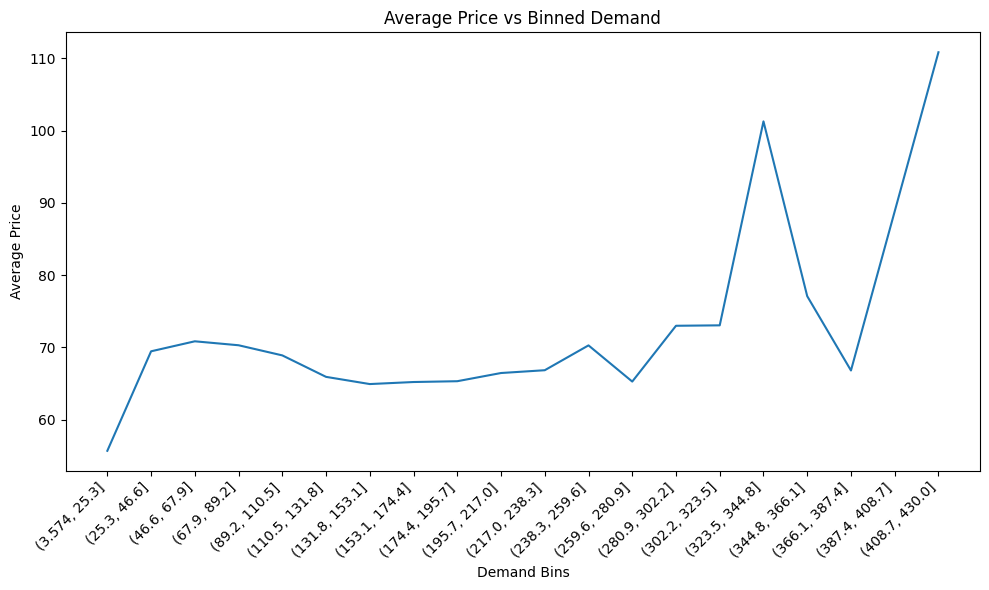

In [ ]:
# Create bins for Demand
df['Demand_Bins'] = pd.cut(df['Demand'], bins=20) # You can adjust the number of bins

# Group by Demand Bins and calculate average price
binned_price_demand = df.groupby('Demand_Bins')['Price'].mean().reset_index()

# Convert Demand_Bins to string for plotting
binned_price_demand['Demand_Bins'] = binned_price_demand['Demand_Bins'].astype(str)

# Plot the binned line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Demand_Bins', y='Price', data=binned_price_demand)
plt.title('Average Price vs Binned Demand')
plt.xlabel('Demand Bins')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#data pre processing
